In [170]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')

In [233]:
#importation des données /chargement du fichier
import pandas  as pd
df_cga_prediction = pd.read_excel (r'C:\Users\amin\Downloads\amine.xlsx')

pd.set_option('display.max_columns',88)

In [269]:
from sklearn.model_selection import train_test_split

X=df_cga_prediction[[ 'Mois','Ann_e','precipitation','WindVitesse','Temperature']]  # Features
y=df_cga_prediction['Nombre_de_sinistre']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [240]:
df.columns

Index(['Mois', 'Ann_e', 'Temperature', 'precipitation', 'WindVitesse',
       'Nombre_de_sinistre'],
      dtype='object')

In [251]:
X

,Mois,Ann_e,precipitation,WindVitesse,Temperature
0,1,2017,0.668683,23.240591,11.340726
1,2,2017,0.574702,21.293155,14.913690
2,3,2017,0.240860,22.474462,16.890457
3,4,2017,0.358056,22.419444,19.143750
4,5,2017,0.164247,22.633065,24.682796
5,6,2017,0.236250,20.297222,29.047917
6,7,2017,0.043145,22.419355,31.493952
7,8,2017,0.050403,19.340054,32.131720
8,9,2017,0.214861,21.227778,27.203472
9,10,2017,0.615054,18.736559,22.399866


In [242]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
def evaluate(model):
   
    model.fit(X,y)
    ypred=model.predict(X)
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred)
    mse=metrics.mean_squared_error(y_test, ypred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)
    print(model.__class__.__name__)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    
    sns.regplot(y_test,ypred)
    c = [i for i in range(1,len(y_test)+1,1)]
    plt.subplot(1,2,2)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,ypred, color="red",  linewidth=2.5, linestyle="-") 
    plt.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Test Set', fontsize=18)                           
    plt.ylabel('target', fontsize=16) 
    plt.show()

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=43)

In [247]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [255]:
print("Best Estimator: \n{}\n".format(grid_regressor.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_regressor.best_params_))
print("Best Test Score: \n{}\n".format(grid_regressor.best_score_))

# # This prints out all results during Cross-Validation in details
#print("All Meta Results During CV Search: \n{}\n".format(gs.cv_results_))

Best Estimator: 
RandomForestRegressor(max_depth=4, n_estimators=200, random_state=0)

Best Parameters: 
{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

Best Test Score: 
-2.2228561192606477



In [270]:
gridRandom=RandomForestRegressor(max_depth=4, max_features='auto', n_estimators=200,random_state=0)
gridRandom.fit(X,y)
evaluate(gridRandom)


ValueError: Found input variables with inconsistent numbers of samples: [10, 33]

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_roaming, train_size=0.8 , random_state=43)

NameError: name 'y_roaming' is not defined

## KNeighborsRegressor

In [188]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

GridSearchCV
explained_variance:  -2.2502
mean_squared_log_error:  0.2958
r2:  -5.2882
MAE:  3105.5714
MSE:  10640315.8571
RMSE:  3261.9497


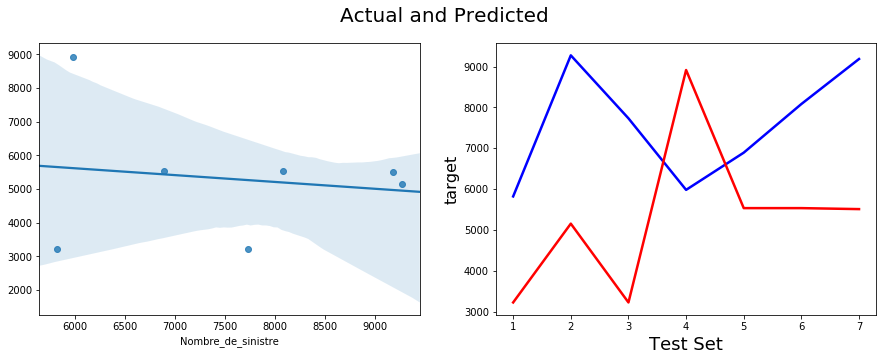

In [189]:
gridKnn.fit(X_train,y_train)
evaluate(gridKnn)
testKnn=gridKnn.score(X_test,y_test)
trainKnn=gridKnn.score(X_train,y_train)

In [142]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

AttributeError: 'KNeighborsRegressor' object has no attribute 'best_score_'

## BaggingRegressor

In [25]:
# from sklearn.ensemble import BaggingRegressor
# bag=BaggingRegressor(random_state=42)
# param_grid = { 'max_samples': [i for i in range(1,50)],
#                'max_features': [i for i in range(1,250)]
#                }
# gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
# gridBag.fit(X_train, y_train)

In [118]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)
testbag=bag.score(X_test,y_test)
trainbag=bag.score(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[20180916 20170224 20180808 20180222 20180824 20190311 20181204 20180307
 20171206 20181122 20171213 20190814 20180817 20180726 20180926 20170612
 20180121 20180816 20170809 20171230 20190713 20190616 20180523 20180731
 20171013 20180410 20180428 20190607 20181212 20170125 20180123 20190808
 20171011 20181203 20170415 20190523 20180629 20180530 20190324 20190211
 20170823 20180626 20190726 20170713 20181223 20181031 20170509 20180422
 20180220 20181228 20180505 20180112 20170620 20170522 20181030 20180827
 20190322 20171108 20170615 20180207 20190412 20180106 20190803 20180905
 20181026 20170816 20170216 20190427 20181023 20190301 20170225 20190620
 20170429 20181018 20190318 20181011 20180405 20190331 20190614 20181022
 20190410 20170603 20180830 20181121 20180915 20170804 20170214 20180920
 20180615 20171223 20181015 20180801 20181119 20180602 20170925 20170928
 20190629 20170923 20170526 20170605 20170511 20171123 20170323 20180327
 20170815 20170731 20180301 20171212 20170320 20170720 20181206 20190807
 20181231 20170515 20170617 20190817 20181106 20180607 20180904 20170124
 20180906 20181117 20190820 20170330 20180122 20190217 20180201 20180210
 20181124 20171119 20170808 20190711 20181006 20180706 20170722 20170830
 20190319 20190503 20190510 20170223 20180911 20190330 20180514 20180306
 20190810 20170325 20180111 20180326 20170131 20180901 20190109 20171103
 20180409 20170628 20171226 20170919 20190118 20190920 20180720 20181024
 20180226 20181208 20190913 20170118 20190401 20171219 20180308 20190111
 20180117 20190827 20170204 20170718 20170822 20190828 20180815 20190703
 20180526 20180712 20170904 20181112 20170105 20190918 20170501 20190730
 20181221 20180115 20190115 20181005 20181019 20181004 20171125 20171229
 20170304 20170906 20180722 20171231 20170520 20170730 20180903 20170109
 20171008 20170222 20170203 20190102 20190329 20170121 20170310 20180418
 20170422 20180411 20170305 20171105 20190321 20170420 20190426 20190601
 20171009 20190822 20190809 20180622 20170427 20170404 20170607 20180219
 20190404 20181219 20171018 20190815 20180424 20181001 20180917 20170915
 20180727 20180318 20190720 20190801 20181017 20190216 20190508 20190710
 20181107 20170410 20170821 20190422 20170801 20170903 20171227 20171107
 20171110 20190214 20180723 20181210 20180407 20190425 20190419 20190405
 20180914 20180511 20170926 20170123 20170916 20170518 20190123 20180605
 20190613 20170210 20180822 20170810 20180831 20180225 20190527 20180322
 20180618 20180612 20180321 20171209 20170913 20190709 20181113 20170727
 20190908 20180304 20170502 20180324 20190315 20170412 20180601 20180804
 20190326 20170717 20170920 20181029 20180310 20190816 20190124 20170428
 20170316 20170103 20171031 20180628 20171126 20170715 20171106 20170622
 20170908 20171109 20170205 20190904 20170829 20190628 20181105 20180320
 20170217 20170630 20180921 20190729 20180102 20170824 20190314 20170307
 20180613 20170828 20170905 20190926 20190603 20190916 20170321 20180305
 20180212 20190521 20170411 20180913 20180104 20170609 20190526 20180623
 20180512 20190708 20170328 20170114 20190612 20180420 20180716 20171128
 20180922 20170401 20171012 20180331 20190222 20180508 20181211 20170930
 20180103 20170527 20171121 20170218 20180430 20180820 20170208 20190112
 20180803 20190212 20170618 20170407 20170907 20180616 20180208 20190121
 20170419 20180404 20170329 20171030 20180312 20181116 20170227 20180908
 20170627 20190702 20170728 20190914 20170530 20180924 20180711 20171104
 20190408 20180923 20171028 20180124 20171021 20171006 20180419 20190518
 20180811 20170106 20180113 20170811 20180227 20170909 20170619 20170421
 20181102 20190727 20180108 20170616 20170922 20170602 20170512 20180429
 20190615 20180717 20171221 20180131 20170831 20170708 20190116 20180323
 20180425 20190903 20171203 20190226 20180317 20170104 20171127 20190902
 20170405 20170311 20190831 20190418 20171117 20190924 20190805 20181103
 20180702 20171207 20170119 20170826 20190911 20180507 20170608 20180125
 20180828 20190110 20190514 20180814 20170102 20190219 20171202 20190213
 20180401 20190122 20180223 20171022 20190406 20190909 20180608 20180701
 20190218 20180522 20190306 20190928 20190320 20190221 20180118 20190227
 20190529 20181002 20170803 20170110 20180221 20190113 20180518 20180805
 20190528 20171025 20180520 20190718 20170519 20171005 20181222 20180802
 20171019 20190117 20170322 20190925 20190701].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
# gridBag.fit(X_train,y_train)
# gridBag.best_estimator_

In [28]:
# print('Best Score: '+str(gridBag.best_score_))
# evaluate(gridBag.best_estimator_)

## VotingRegressor

VotingRegressor
explained_variance:  0.5484
mean_squared_log_error:  0.006
r2:  0.5484
MAE:  0.2531
MSE:  0.2169
RMSE:  0.4657


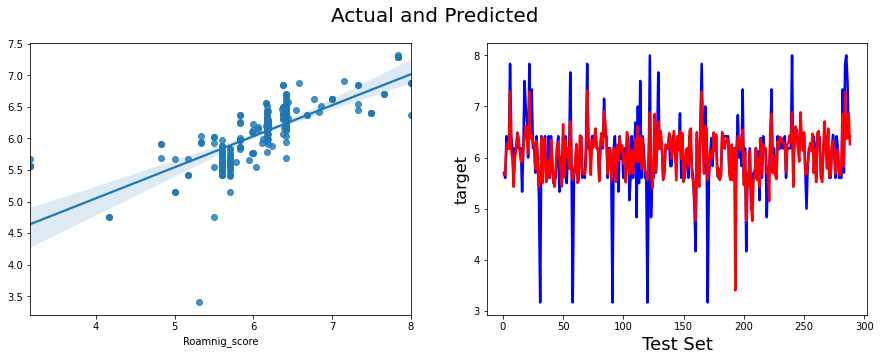

In [29]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)
testvot=vot.score(X_test,y_test)
trainvot=vot.score(X_train,y_train)

## StackingRegressor

StackingRegressor
explained_variance:  0.3139
mean_squared_log_error:  0.0083
r2:  0.313
MAE:  0.3262
MSE:  0.3299
RMSE:  0.5744


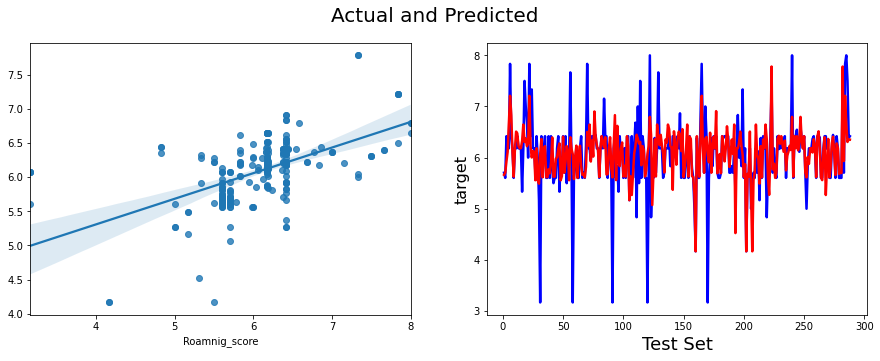

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)
testStackingreg=Stackingreg.score(X_test,y_test)
trainStackingreg=Stackingreg.score(X_train,y_train)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.5707
mean_squared_log_error:  0.0069
r2:  0.5704
MAE:  0.1924
MSE:  0.2063
RMSE:  0.4542


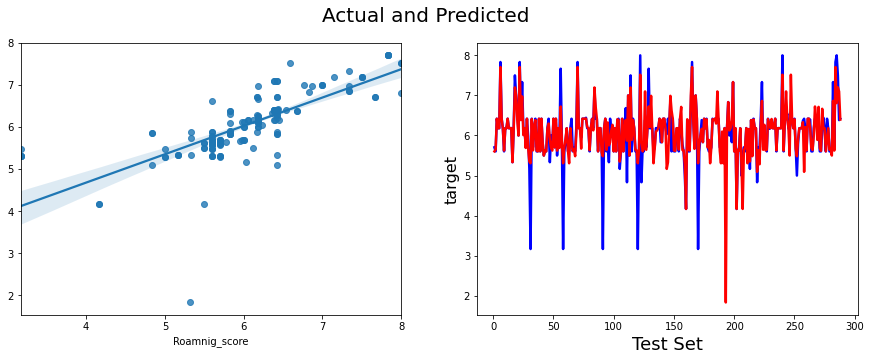

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)
testext=ext.score(X_test,y_test)
trainext=ext.score(X_train,y_train)

## XGBRegressor

In [32]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)
testxgboost_1=xgboost_1.score(X_test,y_test)
trainxgboost_1=xgboost_1.score(X_train,y_train)

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)
testxgboost_1=xgboost_1.score(X_test,y_test)
trainxgboost_1=xgboost_1.score(X_train,y_train)

# Selecting best features for Appel Service

In [34]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_appel)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1]


In [35]:
bestcols_appel=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_appel, y_appel, train_size=0.8 , random_state=43)

### Roaming_Score Predicting using Random Forest

In [37]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,58,50,200],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 58, 50, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Best Score: 0.7552894305382728
RandomForestRegressor
explained_variance:  0.6349
mean_squared_log_error:  0.0085
r2:  0.6329
MAE:  0.4202
MSE:  0.3869
RMSE:  0.622


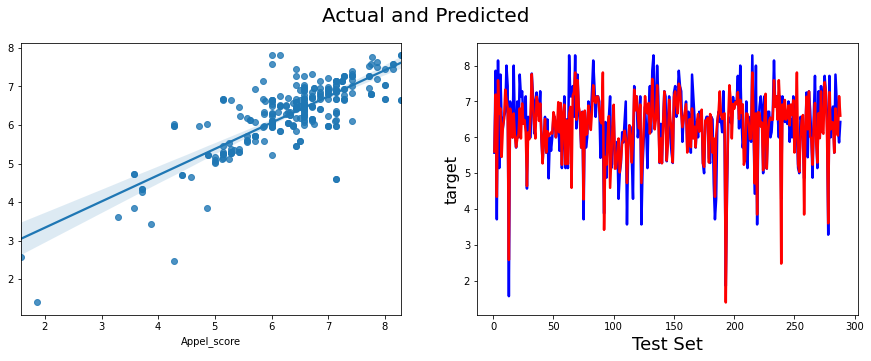

In [38]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
print('Best Score: '+str(grid_regressor.best_score_))
evaluate(gridRandom)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_appel, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

In [41]:
gridKnn.fit(X_train,y_train)
gridKnn.best_estimator_

KNeighborsRegressor(leaf_size=40, n_neighbors=99, p=1, weights='distance')

Best Score: 0.48462913764340776
KNeighborsRegressor
explained_variance:  0.6306
mean_squared_log_error:  0.0082
r2:  0.6279
MAE:  0.4117
MSE:  0.3921
RMSE:  0.6262


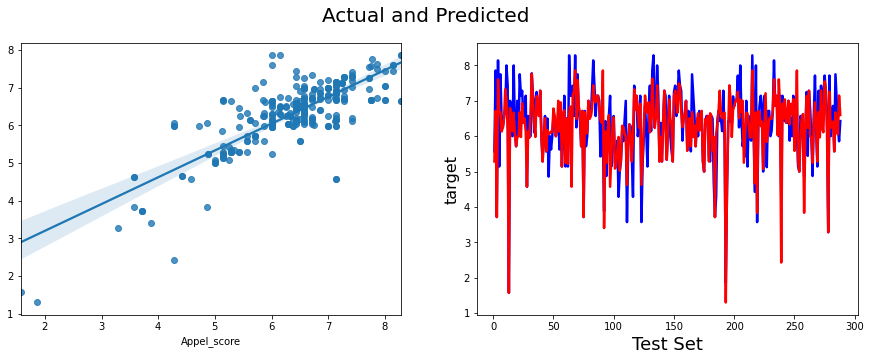

In [107]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)
testKnn=gridKnn.score(X_test,y_test)
trainKnn=gridKnn.score(X_train,y_train)

## BaggingRegressor

In [43]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [44]:
gridBag.fit(X_train,y_train)
gridBag.best_estimator_

BaggingRegressor(max_features=28, max_samples=48, random_state=42)

Best Score: 0.5367188400532843
BaggingRegressor
explained_variance:  0.6557
mean_squared_log_error:  0.0077
r2:  0.6538
MAE:  0.4037
MSE:  0.3649
RMSE:  0.6041


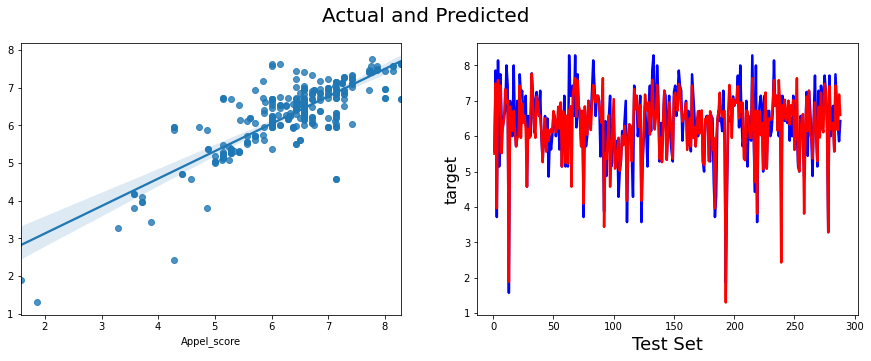

In [108]:
print('Best Score: '+str(grid_regressor.best_score_))
bag=BaggingRegressor(random_state=45)
evaluate(bag)
testbag=bag.score(X_test,y_test)
trainbag=bag.score(X_train,y_train)

## VotingRegressor

VotingRegressor
explained_variance:  0.5708
mean_squared_log_error:  0.0109
r2:  0.5689
MAE:  0.526
MSE:  0.4544
RMSE:  0.6741


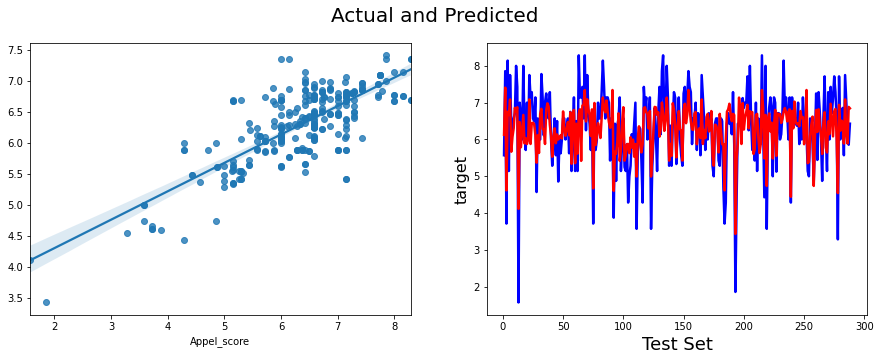

In [109]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)
testvot=vot.score(X_test,y_test)
trainvot=vot.score(X_train,y_train)

## StackingRegressor

StackingRegressor
explained_variance:  0.2302
mean_squared_log_error:  0.0194
r2:  0.2187
MAE:  0.695
MSE:  0.8235
RMSE:  0.9075


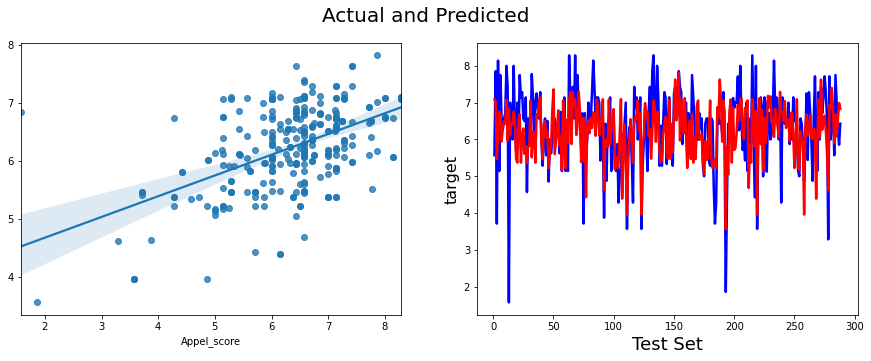

In [110]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)
testStackingreg=Stackingreg.score(X_test,y_test)
trainStackingreg=Stackingreg.score(X_train,y_train)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.6505
mean_squared_log_error:  0.0079
r2:  0.6489
MAE:  0.3879
MSE:  0.37
RMSE:  0.6083


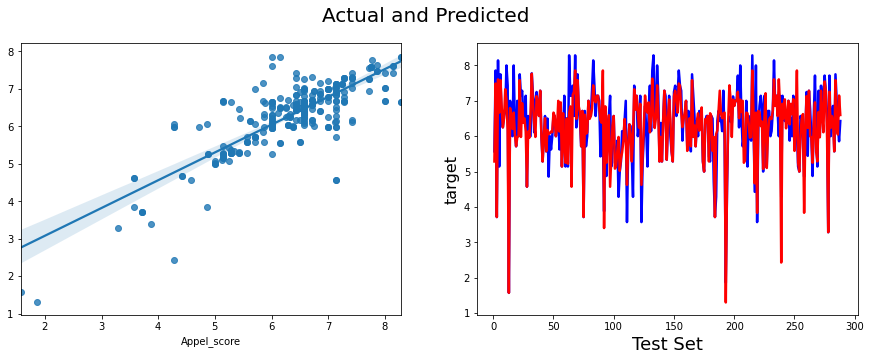

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)
testext=ext.score(X_test,y_test)
trainext=ext.score(X_train,y_train)

## XGBRegressor

In [112]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)
testxgboost_1=xgboost_1.score(X_test,y_test)
trainxgboost_1=xgboost_1.score(X_train,y_train)

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [51]:
grid.best_score_

0.7491658656231783

In [52]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000}

In [53]:
grid.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
XgboostBest=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Selecting best features for Internet Service

In [56]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_internet)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 1 1]


In [ ]:
bestcols_internet=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_internet, y_internet, train_size=0.8 , random_state=43)

### Roaming_Score Predicting using Random Forest

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,58,50,200],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

In [ ]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
print('Best Score: '+str(grid_regressor.best_score_))
evaluate(gridRandom)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_internet, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [58]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

In [59]:
gridKnn.fit(X_train,y_train)
gridKnn.best_estimator_

KNeighborsRegressor(leaf_size=40, n_neighbors=99, p=1, weights='distance')

Best Score: 0.37217897491258856
KNeighborsRegressor
explained_variance:  0.3959
mean_squared_log_error:  0.0137
r2:  0.3872
MAE:  0.3454
MSE:  0.5391
RMSE:  0.7343


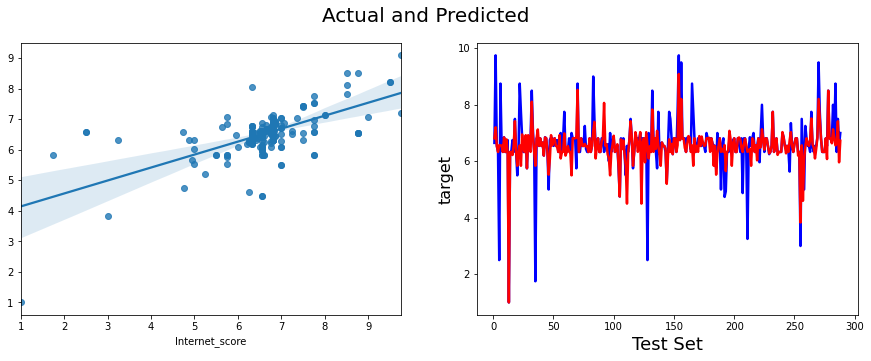

In [60]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

## BaggingRegressor

In [61]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [62]:
gridBag.fit(X_train,y_train)
gridBag.best_estimator_

BaggingRegressor(max_features=21, max_samples=46, random_state=42)

Best Score: 0.1155923545027214
BaggingRegressor
explained_variance:  0.0749
mean_squared_log_error:  0.0221
r2:  0.0559
MAE:  0.5549
MSE:  0.8306
RMSE:  0.9113


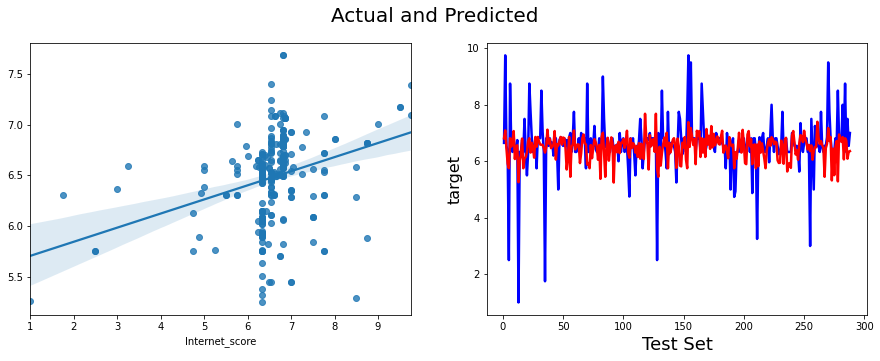

In [63]:
print('Best Score: '+str(gridBag.best_score_))
evaluate(gridBag.best_estimator_)

## VotingRegressor

VotingRegressor
explained_variance:  0.3825
mean_squared_log_error:  0.0164
r2:  0.3779
MAE:  0.4005
MSE:  0.5473
RMSE:  0.7398


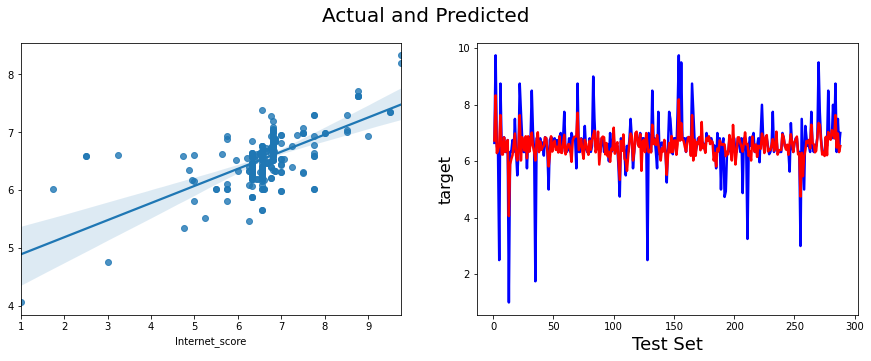

In [64]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)

## StackingRegressor

StackingRegressor
explained_variance:  0.0037
mean_squared_log_error:  0.0242
r2:  0.0026
MAE:  0.5372
MSE:  0.8774
RMSE:  0.9367


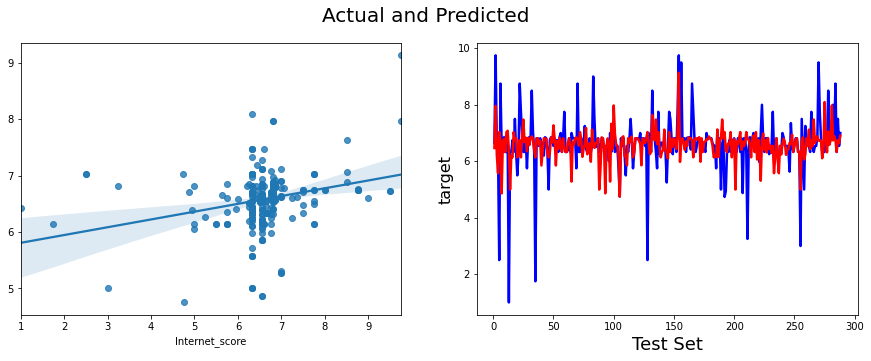

In [65]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.4779
mean_squared_log_error:  0.0128
r2:  0.475
MAE:  0.3161
MSE:  0.4618
RMSE:  0.6796


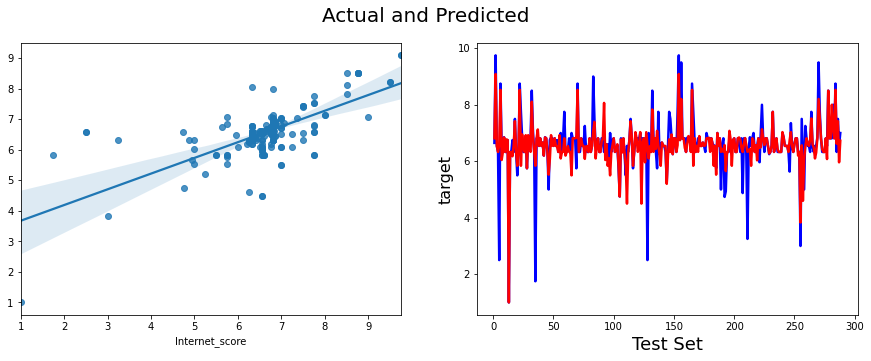

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)

## XGBRegressor

In [67]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)

0.47450574267106627

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [69]:
grid.best_score_

0.42516572716675416

In [70]:
grid.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [ ]:
grid.best_estimator_


In [ ]:
XgboostBest=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Selecting best features for Global Score

In [71]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, 25)
fit = rfe.fit(X, y_note)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 25
Selected Features: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True]
Feature Ranking: [1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1]


In [72]:
bestcols_note=X[X.columns[fit.support_]]

## Splitting Data into Training and Testing Sets for Roaming_Service

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bestcols_note, y_note, train_size=0.8 , random_state=43)

### Roaming_Score Predicting using Random Forest

In [74]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,58,50,200],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 58, 50, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Best Score: 0.5367188400532843
RandomForestRegressor
explained_variance:  0.5606
mean_squared_log_error:  0.002
r2:  0.5601
MAE:  2.2864
MSE:  10.0582
RMSE:  3.1715


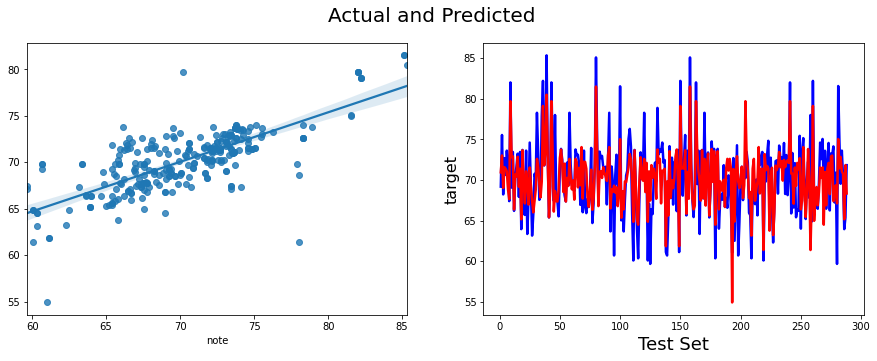

In [75]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
print('Best Score: '+str(grid_regressor.best_score_))
evaluate(gridRandom)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_note, train_size=0.8 , random_state=43)

## KNeighborsRegressor

In [77]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

In [78]:
gridKnn.fit(X_train,y_train)
gridKnn.best_estimator_

KNeighborsRegressor(leaf_size=1, n_neighbors=99, p=1, weights='distance')

Best Score: 0.48462913764340776
KNeighborsRegressor
explained_variance:  0.5088
mean_squared_log_error:  0.0023
r2:  0.5082
MAE:  2.3554
MSE:  11.2445
RMSE:  3.3533


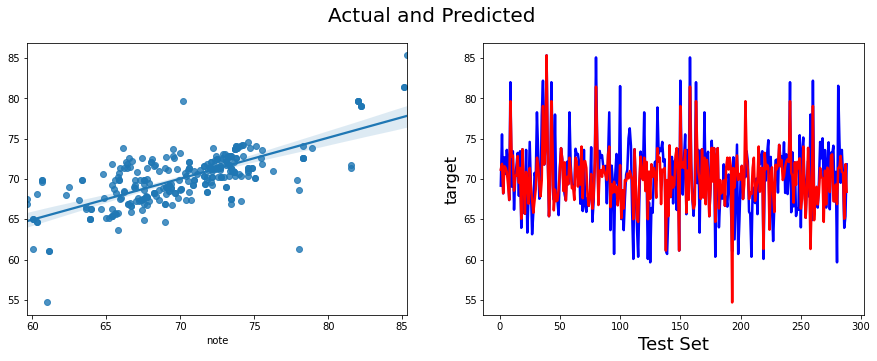

In [79]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

## BaggingRegressor

In [80]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [81]:
gridBag.fit(X_train,y_train)
gridBag.best_estimator_

BaggingRegressor(max_features=25, max_samples=47, random_state=42)

Best Score: 0.15071360632941325
BaggingRegressor
explained_variance:  0.2181
mean_squared_log_error:  0.0034
r2:  0.2181
MAE:  3.2071
MSE:  17.8768
RMSE:  4.2281


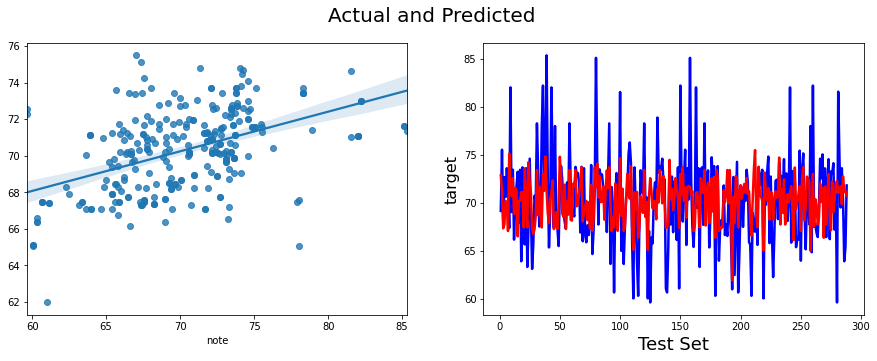

In [82]:
print('Best Score: '+str(gridBag.best_score_))
evaluate(gridBag.best_estimator_)

## VotingRegressor

VotingRegressor
explained_variance:  0.5094
mean_squared_log_error:  0.0022
r2:  0.5094
MAE:  2.6236
MSE:  11.216
RMSE:  3.349


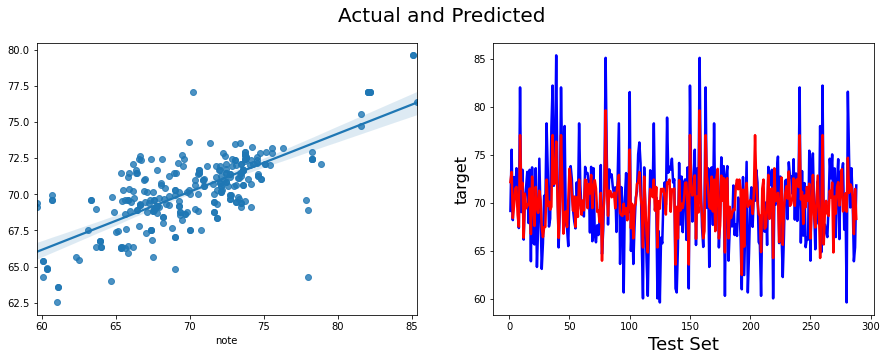

In [83]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)

## StackingRegressor

StackingRegressor
explained_variance:  0.0739
mean_squared_log_error:  0.0042
r2:  0.0739
MAE:  3.5115
MSE:  21.1746
RMSE:  4.6016


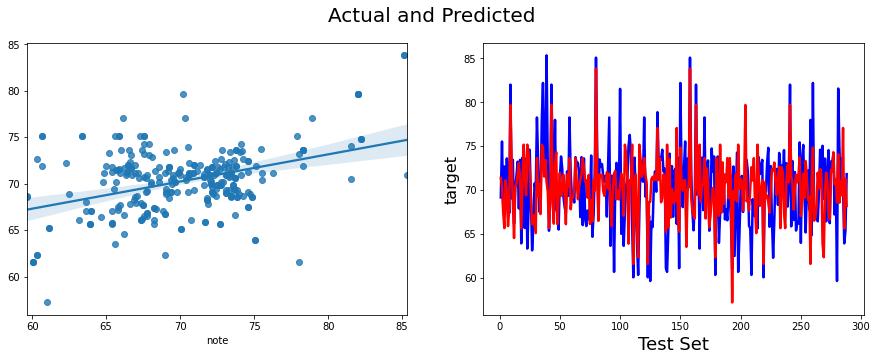

In [84]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)

## ExtraTreesRegressor

ExtraTreesRegressor
explained_variance:  0.5882
mean_squared_log_error:  0.0019
r2:  0.5882
MAE:  2.0828
MSE:  9.416
RMSE:  3.0686


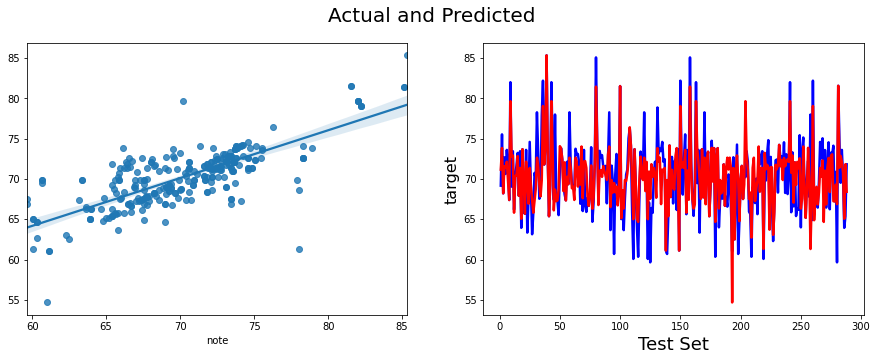

In [85]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train, y_train)
evaluate(ext)

## XGBRegressor

In [86]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(random_state=0)

xgboost_1.fit(X_train, y_train)
xgboost_1.predict(X_test)
xgboost_1.score(X_test,y_test)

0.5807529507957423

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [88]:
grid.best_score_

0.5439290354513739

In [89]:
grid.best_params_

{'learning_rate': 0.08, 'n_estimators': 200}

In [90]:
grid.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

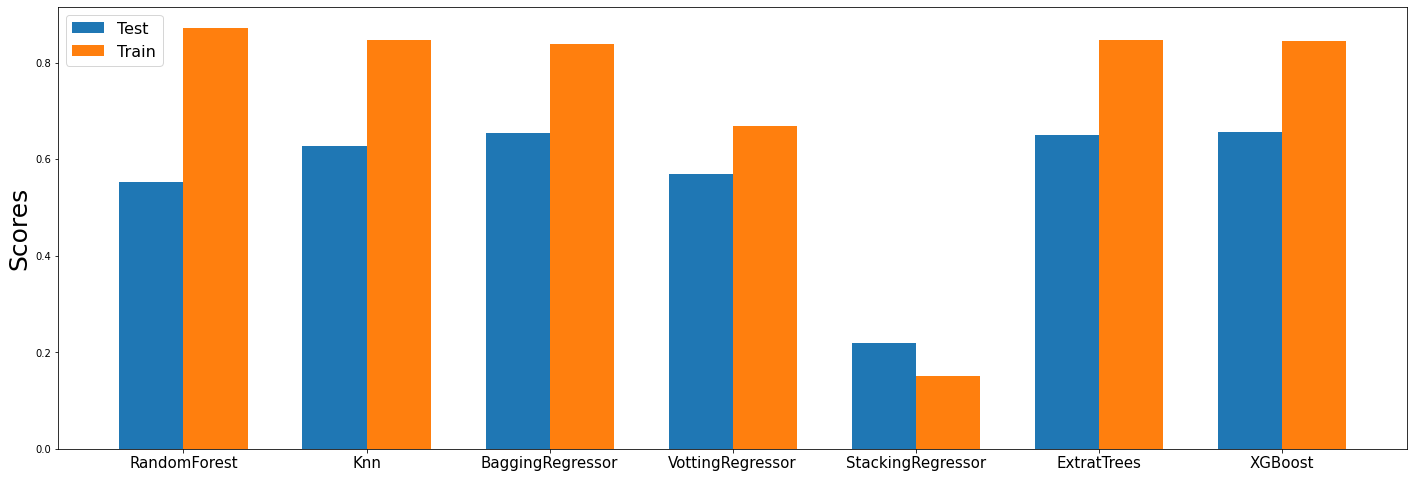

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['RandomForest', 'Knn', 'BaggingRegressor', 'VottingRegressor','StackingRegressor','ExtratTrees','XGBoost']


test = [testRandom, testKnn, testbag, testvot,testStackingreg,testext,testxgboost_1]
train = [trainRandom, trainKnn, trainbag,trainvot,trainStackingreg,trainext,trainxgboost_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test, width, label='Test')
rects2 = ax.bar(x + width/2, train, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontsize = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize = 15)
ax.legend(fontsize = 16)
fig.set_figheight(7)
fig.set_figwidth(20)
fig.tight_layout(pad=2,h_pad=3,w_pad=3)
fig.savefig('comp1.jpg')
plt.show()
